In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df = pd.read_csv("DelayedFlights.csv")


In [4]:
# correcting dates formate
df['DepTime'] = df.DepTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
df['CRSDepTime'] = df.CRSDepTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
df['ArrTime'] = df.ArrTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
df['CRSArrTime'] = df.CRSArrTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)

**Distrbution Of amounts Of Delay**

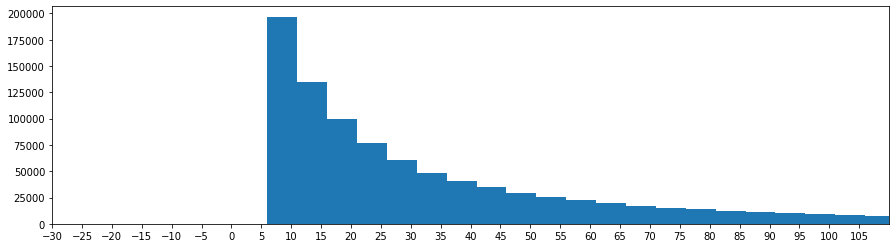

In [5]:
plt.figure(figsize=[15,4])

step = 5
x_min, x_max = -30, 110
bin_edges = np.arange(df.DepDelay.min()-step, df.DepDelay.max()+step, step)
plt.hist(df.DepDelay, bins=bin_edges)
plt.xlim(x_min,x_max)
plt.xticks(np.arange(x_min, x_max, step));

**Total Delay For each Airline**

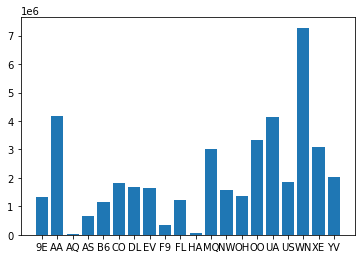

In [7]:
carriers = df.groupby('UniqueCarrier',as_index=False)['DepDelay'].sum()
carriers = pd.DataFrame(carriers)
plt.bar(carriers.UniqueCarrier,carriers.DepDelay);

**Top Delay For each airport**

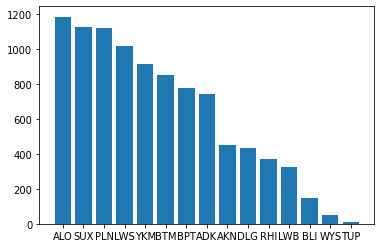

In [8]:
state = df.groupby('Origin',as_index=False)['DepDelay'].sum()
state = pd.DataFrame(state).sort_values('DepDelay',axis = 0,ascending = False).tail(15)
plt.bar(state.Origin,state.DepDelay);

**Reasons of Delay**

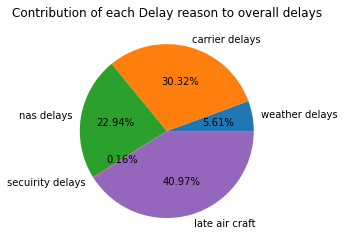

In [9]:
wethear_ct_sum= df['WeatherDelay'].sum()
nas_ct_sum= df['NASDelay'].sum()
carrier_ct_sum= df['CarrierDelay'].sum()
sec_ct_sum =df['SecurityDelay'].sum()
late_aircraft_sum = df['LateAircraftDelay'].sum()


num_of_overall_cancelation = wethear_ct_sum+nas_ct_sum+carrier_ct_sum+sec_ct_sum+late_aircraft_sum

wethear_ct_sum=(wethear_ct_sum/num_of_overall_cancelation)*100
nas_ct_sum=(nas_ct_sum/num_of_overall_cancelation)*100
carrier_ct_sum=(carrier_ct_sum/num_of_overall_cancelation)*100
secuirity_ct_sum=(sec_ct_sum/num_of_overall_cancelation)*100
late_aircraft_sum=(late_aircraft_sum/num_of_overall_cancelation)*100


X = ['weather delays','carrier delays' , 'nas delays', 'secuirity delays','late air craft']
Y = [wethear_ct_sum,carrier_ct_sum, nas_ct_sum, secuirity_ct_sum,late_aircraft_sum]
plt.pie(Y, labels=X , autopct='%1.2f%%')
plt.title('Contribution of each Delay reason to overall delays')
plt.show()